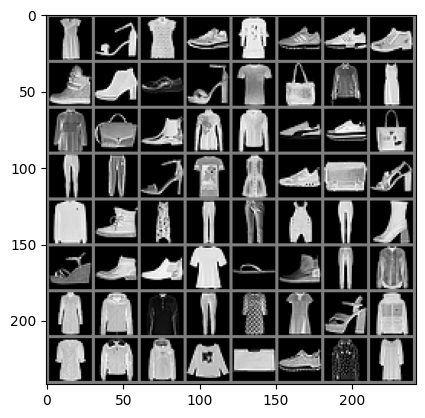

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): Identity()
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): Identity()
  (conv3): Conv2d(16, 120, kernel_size=(4, 4), stride=(1, 1))
  (bn3): Identity()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (bn_fc1): Identity()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)


In [2]:
%run ./Lenet5FashionMNIST.ipynb

# instantiate the model and set the weights
model = LeNet5(use_dropout=True, use_batchnorm=False)

# print out the layer in the network
print(model)

In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [4]:
epochs = 10

train_accuracies = []
val_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)

    model.eval()
    # Validation accuracy
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)

    # Test accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted_test = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")


Epoch 1/10, Loss: 0.7779, Train Acc: 71.05%, Val Acc: 80.43%, Test Acc: 79.67%
Epoch 2/10, Loss: 0.5381, Train Acc: 80.04%, Val Acc: 82.84%, Test Acc: 82.30%
Epoch 3/10, Loss: 0.4796, Train Acc: 82.46%, Val Acc: 84.52%, Test Acc: 84.20%
Epoch 4/10, Loss: 0.4392, Train Acc: 84.27%, Val Acc: 86.02%, Test Acc: 85.46%
Epoch 5/10, Loss: 0.4059, Train Acc: 85.48%, Val Acc: 86.58%, Test Acc: 86.37%
Epoch 6/10, Loss: 0.3829, Train Acc: 86.32%, Val Acc: 86.96%, Test Acc: 86.95%
Epoch 7/10, Loss: 0.3621, Train Acc: 87.09%, Val Acc: 87.48%, Test Acc: 87.16%
Epoch 8/10, Loss: 0.3511, Train Acc: 87.47%, Val Acc: 88.02%, Test Acc: 88.07%
Epoch 9/10, Loss: 0.3389, Train Acc: 87.84%, Val Acc: 87.67%, Test Acc: 87.61%
Epoch 10/10, Loss: 0.3291, Train Acc: 88.31%, Val Acc: 88.23%, Test Acc: 87.89%


In [ ]:
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1,epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train and Test Accuracy per Epoch for testing dropout')
plt.legend()
plt.show()